## Animation
In this notebook, we create an animation of the responses with stimuli cycling through all orientations between 0 and 180 degrees.

In [2]:
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from mpl_toolkits.axes_grid1 import make_axes_locatable

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

import sys
sys.path.append("..")

from opm import make_opm, plot_opm, plot_amplitude_map
from opm.pinwheels import plot_pinwheels
from response import response

ModuleNotFoundError: No module named 'opm.pinwheels'

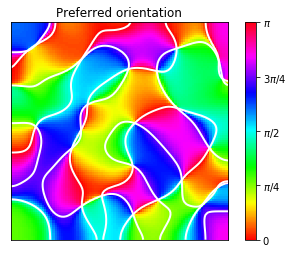

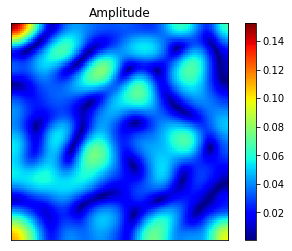

In [2]:
m = make_opm(size=100, sigma=8.)

f, ax = plot_opm(m)
plot_pinwheels(m, ax)

plt.show()

f, ax = plot_amplitude_map(m)

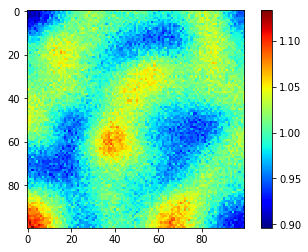

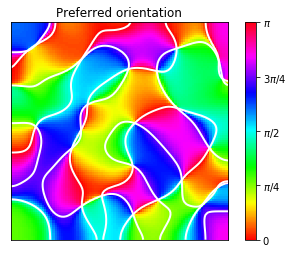

In [3]:
# we now assume we observe a stimulus with contrast c_s and orientation theta_s
c_s = 1.0
theta_s = 1 * np.pi / 4 - np.pi * 0.5

r = response(m, c_s, theta_s, sigma=0.01)

# plot response
plt.imshow(r, cmap='jet')
plt.colorbar()
plt.show()

f, ax = plot_opm(m)
plot_pinwheels(m, ax)

plt.show()

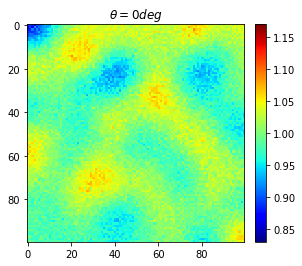

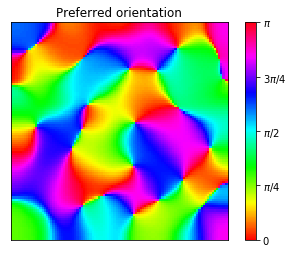

In [4]:
f = plt.figure()
ax = f.add_subplot(111)

# someone on the internet likes to position their colorbars this way, but you don't have to
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

# how many different angles do we want to simulate?
n_thetas = 90

# get all angles
thetas = [i * np.pi / n_thetas - np.pi / 2 for i in range(n_thetas)]

# simulate responses
frames = []
for theta in thetas:

    r = response(m, 1.0, theta, sigma=0.01)
    frames.append(r)
    
# setup initial frame
vmax = max([np.max(r) for r in frames])
vmin = min([np.min(r) for r in frames])
cf = ax.imshow(frames[0], vmax=vmax, vmin=vmin, cmap='jet')
cb = f.colorbar(cf, cax=cax)
tx = ax.set_title('Frame 0')
            
# function gets called at every frame
def animate(i):
    arr = frames[i]
    cf = ax.imshow(arr, vmax=vmax, vmin=vmin, cmap='jet')
    cax.cla()
    f.colorbar(cf, cax=cax)
    tx.set_text(r'$\theta = {0:.0f} deg$'.format((thetas[i] + np.pi / 2) / np.pi * 180))

plot_opm(m)

ani = animation.FuncAnimation(f, animate, frames=len(thetas))

ani